<a href="https://colab.research.google.com/github/dtnovak26/ME239/blob/homeworkUploads/Homework/ME239_HW15_BONUS_novak104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(lecture15:homework)=
# Homework 15

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

## Student details

+ **First Name:** Drew
+ **Last Name:** Novak
+ **Email:** novak104@purdue.edu

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import numpy as np
import scipy.stats as st
import pandas as pd

/var/folders/3n/r5vj11ss7lzcdl10vfhb_mw00000gs/T/ipykernel_24329/98432282.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'svg')


## Problem 1 - Optimizing the performance of a compressor

In this problem we are going to need [this](https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-239-intro-to-data-science/master/data/compressor_data.xlsx) dataset. The dataset was kindly provided to us by [Professor Davide Ziviani](https://scholar.google.com/citations?user=gPdAtg0AAAAJ&hl=en).
As before, you can either put it on your Google drive or just download it with the code segment below:

In [1]:
url = 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-239-intro-to-data-science/master/data/compressor_data.xlsx'
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14771  100 14771    0     0  53115      0 --:--:-- --:--:-- --:--:-- 53324


Note that this is an Excell file, so we are going to need pandas to read it.
Here is how:

In [2]:
import pandas as pd
data = pd.read_excel('compressor_data.xlsx')
data

,T_e,DT_sh,T_c,DT_sc,T_amb,f,m_dot,m_dot.1,Capacity,Power,Current,COP,Efficiency
0,-30,11,25,8,35,60,28.8,8.000000,1557,901,4.4,1.73,0.467
1,-30,11,30,8,35,60,23.0,6.388889,1201,881,4.0,1.36,0.425
2,-30,11,35,8,35,60,17.9,4.972222,892,858,3.7,1.04,0.382
3,-25,11,25,8,35,60,46.4,12.888889,2509,1125,5.3,2.23,0.548
4,-25,11,30,8,35,60,40.2,11.166667,2098,1122,5.1,1.87,0.519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,10,11,45,8,35,60,245.2,68.111111,12057,2525,11.3,4.78,0.722
61,10,11,50,8,35,60,234.1,65.027778,10939,2740,12.3,3.99,0.719
62,10,11,55,8,35,60,222.2,61.722222,9819,2929,13.1,3.35,0.709
63,10,11,60,8,35,60,209.3,58.138889,8697,3091,13.7,2.81,0.693


The data are part of a an experimental study of a variable speed reciprocating compressor.
The experimentalists varied two temperatures $T_e$ and $T_c$ (both in C) and they measured various other quantities.
Our goal is to learn the map between $T_e$ and $T_c$ and measured Capacity and Power (both in W).
First, let's see how you can extract only the relevant data.

In [3]:
# Here is how to extract the T_e and T_c columns and put them in a single numpy array
X = data[['T_e','T_c']].values
X

array([[-30,  25],
       [-30,  30],
       [-30,  35],
       [-25,  25],
       [-25,  30],
       [-25,  35],
       [-25,  40],
       [-25,  45],
       [-20,  25],
       [-20,  30],
       [-20,  35],
       [-20,  40],
       [-20,  45],
       [-20,  50],
       [-15,  25],
       [-15,  30],
       [-15,  35],
       [-15,  40],
       [-15,  45],
       [-15,  50],
       [-15,  55],
       [-10,  25],
       [-10,  30],
       [-10,  35],
       [-10,  40],
       [-10,  45],
       [-10,  50],
       [-10,  55],
       [-10,  60],
       [ -5,  25],
       [ -5,  30],
       [ -5,  35],
       [ -5,  40],
       [ -5,  45],
       [ -5,  50],
       [ -5,  55],
       [ -5,  60],
       [ -5,  65],
       [  0,  25],
       [  0,  30],
       [  0,  35],
       [  0,  40],
       [  0,  45],
       [  0,  50],
       [  0,  55],
       [  0,  60],
       [  0,  65],
       [  5,  25],
       [  5,  30],
       [  5,  35],
       [  5,  40],
       [  5,  45],
       [  5,

In [4]:
# Here is how to extract the Capacity
y = data['Capacity'].values
y

array([ 1557,  1201,   892,  2509,  2098,  1726,  1398,  1112,  3684,
        3206,  2762,  2354,  1981,  1647,  5100,  4547,  4019,  3520,
        3050,  2612,  2206,  6777,  6137,  5516,  4915,  4338,  3784,
        3256,  2755,  8734,  7996,  7271,  6559,  5863,  5184,  4524,
        3883,  3264, 10989, 10144,  9304,  8471,  7646,  6831,  6027,
        5237,  4461, 13562, 12599, 11633, 10668,  9704,  8743,  7786,
        6835,  5891, 16472, 15380, 14279, 13171, 12057, 10939,  9819,
        8697,  7575])

Fit the following multivariate polynomial model to **both the Capacity and the Power**:

$$
y = w_1 + w_2T_e + w_3 T_c + w_4 T_eT_c + w_5 T_e^2 + w_6T_c^2 + w_7 T_e^2T_c + w_8T_eT_c^2 + w_9 T_e^3 + w_{10}T_c^3 + \epsilon,
$$

where $\epsilon$ is a Gaussian noise term with unknown variance.

**Hints:**
+ You may use [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to construct the design matrix of your polynomial features. Do not program the design matrix by hand.
+ You should split your data into training and test and use various diagnostics to make sure that your models make sense.

### Part A - Fit the capacity

Please don't just fit blindly. Split in training and test and use all the usual diagnostics.

In [8]:
# For polynomial features
from sklearn.preprocessing import PolynomialFeatures
# For splitting the data
from sklearn.model_selection import train_test_split
# Importing two more classes for help in plotting (setting up pipeline and scaling)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# Here is how to make Polynomials features
poly = PolynomialFeatures(degree=3)
# Design matrix for train data
Phi_train = poly.fit_transform(X_train)
# Fit with Bayesian Ridge - Use normalize=True to let BayesianRidge
# scale the inputs and outputs to reasonable values (it will subtract their empirical mean
# and divide by their empirical standard deviation)
from sklearn.linear_model import BayesianRidge # Importing
model = BayesianRidge() # Not sure how to implement normalize=True

#testModel = BayesianRidge(normalize=True) # Could not get this to work

# Create pipeline generating scaled polynomial features utilizing Bayesian Ridge regression
model = make_pipeline(poly, StandardScaler(), BayesianRidge())

# Fitting data
model.fit(X_train, y_train)

# Reimplemented preditction here for easier future steps
y_pred = model.predict(X_test)

The mean square error:

In [9]:
from sklearn.metrics import mean_squared_error # look they already have whats needed

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.14


The coefficient of determination R2:

In [10]:
from sklearn.metrics import r2_score # sklearn has a lot of what we ned

# r2_score is method of calculating CoD (R2 value)
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}") # should this be exactly 1?

R2 Score: 1.0000


The observations vs predictions plot:

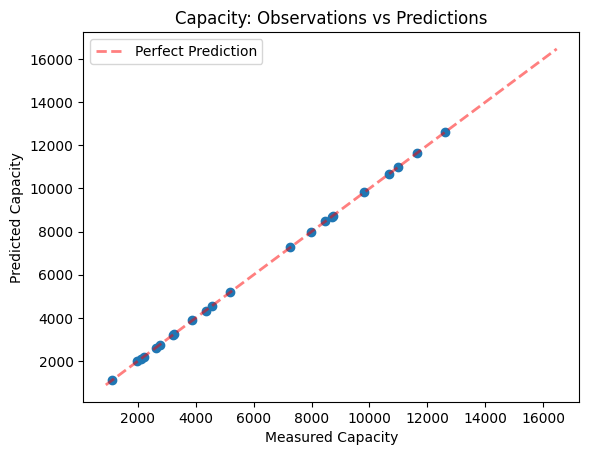

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred) # skatter plot

# Plotting ideal diagonal
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction', alpha = 0.5)

plt.xlabel('Measured Capacity')
plt.ylabel('Predicted Capacity')
plt.title('Capacity: Observations vs Predictions')
plt.legend()
plt.show()

Would you trust your model? Explain your answer.

From what I can tell yes I would trust my model. I am not sure if I have done something incorrectly, but the R2 value is incredibly close to 1.0 which signifies a close fit between measured and predicted capacity. However this does exclude an incorrect assumption in the predicted/measured where both could be off for some reason, so ethis would still have to be accounted for.

### Part B - Fit the power

Repeat what you did above.

In [19]:
# your code here (use as many code and text blocks as you like)
# Extract, Split, Fit, Predict
y_power = data['Power'].values
# Using _p to signfy power
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y_power)

# Use same setup as above to make power fit similar
model_power = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), BayesianRidge())
model_power.fit(X_train_p, y_train_p)

# Prediction
y_pred_p = model_power.predict(X_test_p)

In [21]:
# Calculate Metrics: mse, r2 and print
# Same calculations as above but with power
mse_p = mean_squared_error(y_test_p, y_pred_p)
r2_p = r2_score(y_test_p, y_pred_p)

# Again, I have questions about how well this is fitting, it seems too perfect
print(f"Power Model - MSE: {mse_p:.2f}")
print(f"Power Model - R2: {r2_p:.4f}")

Power Model - MSE: 0.09
Power Model - R2: 1.0000


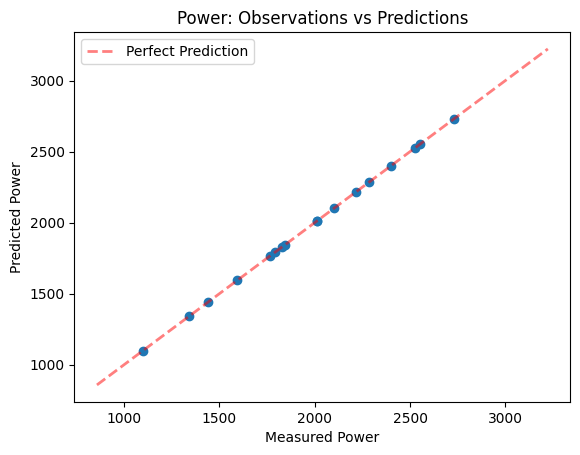

In [22]:
# Plot!
plt.figure()
plt.scatter(y_test_p, y_pred_p) # skatter plot

# Plotting ideal diagonal
plt.plot([y_power.min(), y_power.max()], [y_power.min(), y_power.max()], 'r--', lw=2, label='Perfect Prediction', alpha = 0.5)

plt.xlabel('Measured Power')
plt.ylabel('Predicted Power')
plt.title('Power: Observations vs Predictions')
plt.legend()
plt.show()

**Reflection/Answer** Again this ata seems to match very closely which is good. However it makes it seem like something has gone wrong in the training/splitting/fitting. I've done some elementary research into what could be happening but after finals will come back, read deeper into the textbook and potentially figure out what is causing such a high R2 value and close correlation!

Run the following code to convert the notebook to a pdf. Verify that the file path to the notebook is correct.

In [23]:
from google.colab import drive
drive.mount('/content/drive')
!apt-get install inkscape texlive texlive-xetex texlive-latex-extra pandoc --quiet
!pip install pypandoc --quiet
!jupyter nbconvert --to PDF '/content/drive/MyDrive/Colab Notebooks/ME239_HW15_BONUS_novak104.ipynb'

Mounted at /content/drive
Reading package lists...
Building dependency tree...
Reading state information...
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  aspell aspell-en at-spi2-core dictionaries-common dvisvgm enchant-2 fig2dev
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 gawk ghostscript glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas gsfonts hunspell-en-us
  imagemagick imagemagick-6-common imagemagick-6.q16 lib2geom1.1.0
  libapache-pom-java libaspell15 libatk-bridge2.0-0 libatk1.0-0 libatk1.0-data
  libatkmm-1.6-1v5 libatspi2.0-0 libboost-filesystem1.74.0 libcairomm-1.0-1v5
  libcdr-0.1-1 libcommons-logging-java libcommons-parent-java libdbus-glib-1-2
  libdjvulibre-text libdjvulibre21 libdouble-conversion3 libenchant-2-2
  libfftw3-double3 libfontbox-java libgc1 libglibmm-2.4-1v5 libgs9